<a href="https://colab.research.google.com/github/MadhusudhanRangaswamaiah/EVA-Session-4/blob/master/2nd_DNN_ntw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second Network-
We got some tools with us like Batch Normalization, Dropout, Larger Batch Size etc..

Let's get down to business and apply our first tool..


To start with, Batch Normalization technique is used and the network's performance is studied.

Before we look in to our code, let's understand Batch Normalization. Batch Normalization was first introduced by two researchers at Google, Sergey Ioffe and Christian Szegedy in their paper **‘Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift‘** in 2015. 

The authors showed that batch normalization improved the top result of ImageNet (2014) by a significant margin using only 7% of the training steps. Today, Batch Normalization is used in almost all CNN architectures.

Batch Normalization tries to address what is called as **Internal Covariate Shift**.

**Internal Covariate Shift** refers to shift in Covariates' (weights) distribution from layer to layer.  This happens because, as the network learns and the weights are updated, the distribution of outputs of a specific layer in the network changes. This forces the higher layers to adapt to that drift, which *slows down learning*.

**Why learning gets slowed down?**
The problem is when you have features/weights with different scales. A commonly used optimization technique, such as gradient descent, uses the product of the learning rate times the gradient of the cost function as the step size. As a result, when the features have different scales, the step size can be different for each feature. When you try different learning rates, you will find that 1) the learning rate is too small and it will take a long time to converge, or 2) the learning rate is too big for one or more features, and it never converges. (Quora Answer by Roberto Reif).

By doing Normalization, the distribution of weights in all layers will become same making it possible to reach the optimum solution faster ==> (high learning rate)

**=================================================================================================**

__Now, let's see what happened by adding Batch Normalization in this network.__

You can see that Batch Normalization has added 128 parameters whenever used. 
It adds **4 parameters** [gamma weights, beta weights, moving_mean(non-trainable), moving_variance(non-trainable)] **on every feature/Kernel of the previous layer**.

**==> 32 Filters x 4 parameters = 128 parameters.**

These addition of parameters will slow down each epoch which is evident here.
In the last code (1st Vanilla DNN), **each epoch used to take around 8s on an average which is 13s now, but the number of epochs required to train data has come down.**
As you can see in 1st network, it is only in 10th epoch the training accuracy has crossed 99.6%, whereas the training accuracy has crossed 99.6% in the 6th or 7th epoch itself and thus adding Batch Normalization will speed up training of the network.

But here the learning rate is fixed. Increasing the learning rate will further accelerate the training.

Let's increase **Learning Rate** in adam optimizer. It's seen that the **network gets trained faster**.

==> *Number of epochs can be reduced*

Also, Batch Normalization will add Regularization which addresses Overfitting problem.

***Batch Normalization's benefits are more apparent in very large scale DNNs such as the residual neural networks (ResNet) with 200+ layers than smaller shallower networks.***



# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
                      #The Python Package Index (PyPI) is a repository of 
                      #software for the Python programming language.
    
                      #pip installs Keras. Keras is an open network open-source 
                      #neural-network library written in Python. 
import keras
                      #Python code in this module gains access to the code 
                      #in Keras module by the process of importing it using 
                      #the import statement.
      
                      #Keras is an open source neural-network library written 
                      #in Python.
                      #Keras-Modular: Building models is as simple as stacking 
                      #layers and connecting graphs.

In [0]:
import numpy as np    # import numpy package as np (alias)
from keras.models import Sequential
                                        #The core data structure of Keras is 
                                        #a model (a way to organize layers)
                                        #The Simplest type of model is 
                                        #Sequential Model (a linear stack of 
                                        #layers)
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization 
from keras.utils import np_utils

from keras.datasets import mnist        #MNIST database of handwritten digits
                                        #Dataset of 60,000 28x28 grayscale 
                                        #images of the 10 digits, along with a 
                                        #test set of 10,000 images.

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Returns 2 Tuples - 
                                                           
#1. x_train, x_test: uint8 array of grayscale image data with shape 
#   (num_samples, 28, 28).
#2. y_train, y_test: uint8 array of digit labels (integers in range 0-9) with 
#   shape (num_samples,).

(60000, 28, 28)


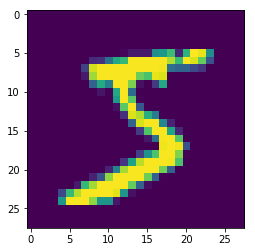

In [0]:
print (X_train.shape)#Prints the dimension of the array X_train-
                     # Dataset of 60,000 28x28 grayscale images of the 10 digits
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])#Displays the first image in X_train Dataset

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
# (60000, 28, 28, 1)==>(nb_samples, width, height, nb_channels)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
# (10000, 28, 28, 1)==>(nb_samples, width, height, nb_channels)

In [0]:
X_train = X_train.astype('float32')  #Convert X_train data from uint8 (0to255)
                                     #to float32 
X_test = X_test.astype('float32')    #Convert X_test data from uint8 (0to255) 
                                     #to float32
X_train /= 255                       #Normalize X_train data
X_test /= 255                        #Normalize X_test data

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]
#uint8 array of labels (integers in range 0-9) with shape (num_samples,)==> 
#First 10 Data

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

#(# of filters, Kernel Size, activation='relu',
#input shape must be specified for first Layer-->28x28 (1 Channel))
#'relu' - Rectified Linear Unit: returns element-wise max(x, 0).
#i/p(28x28x(1Channel)|(3x3x(1Channel)x(32 no. of filters)|(26x26x(32 no. of channels))o/p

##
model.add(BatchNormalization())
##

model.add(MaxPooling2D(pool_size = (2,2)))

#MaxPooling --> o/p 13x13x(32 no. of channels)

model.add(Convolution2D(32, 3, 3, activation='relu'))

#(# of filters, Kernel Size, activation='relu',
#'relu' - Rectified Linear Unit: returns element-wise max(x, 0).
#i/p(13x213x(32 Channel)|(3x3x(32Channel)x(32 no. of filters)|(11x11x(32 no. of channels))o/p

##
model.add(BatchNormalization())
##

model.add(MaxPooling2D(pool_size = (2,2)))

#MaxPooling --> o/p 5x5x(32 no. of channels)

model.add(Convolution2D(32, 3, 3, activation='relu'))

#(# of filters, Kernel Size, activation='relu',
#'relu' - Rectified Linear Unit: returns element-wise max(x, 0).
#i/p(5x5x(32 Channel)|(3x3x(32Channel)x(32 no. of filters)|(3x3x(32 no. of channels))o/p

##
model.add(BatchNormalization())
##

model.add(Convolution2D(10, 3))

#'relu' - Rectified Linear Unit: returns element-wise max(x, 0).
#i/p(3x3x(1Channel)|(3x3x(32Channel)x(10 no. of filters)|(1x1x(10 no. of channels))o/p

model.add(Flatten())
# now: model.output_shape == (None, 10)
# Flattening means to remove all of the dimensions except for one.

model.add(Activation('softmax'))
#Softmax function that takes as input a vector of K real numbers, and normalizes it into a 
#probability distribution consisting of K probabilities.
#That is, prior to applying softmax, some vector components could be negative, or greater than one; 
#and might not sum to 1; but after applying softmax, each component will be in the interval ( 0 , 1 ), 
#and the components will add up to 1, so that they can be interpreted as probabilities.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
#model.compile(loss='categorical_crossentropy',
#             optimizer='adam',
#             metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',
#             optimizer=Adam(lr=0.003),
#             metrics=['accuracy'])
#categorical_crossentropy - It compares the predicted label and true label and calculates the loss. 
#When doing multi-class classification, categorical cross entropy loss is used a lot.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 16s 261us/step - loss: 0.1135 - acc: 0.9661 - val_loss: 0.0680 - val_acc: 0.9795
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 4s 73us/step - loss: 0.0368 - acc: 0.9889 - val_loss: 0.0407 - val_acc: 0.9877
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 5s 79us/step - loss: 0.0239 - acc: 0.9924 - val_loss: 0.0365 - val_acc: 0.9891
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 5s 80us/step - loss: 0.0162 - acc: 0.9950 - val_loss: 0.0320 - val_acc: 0.9895
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [========

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_76 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization_77 (Batc (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 3, 3, 32)          9248      
__________

In [0]:
#score = model.evaluate(X_test, Y_test, verbose=0)#Returns loss value and metric values for the Test Dataset

In [0]:
#model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)
#Trains the model for the given number of epochs (iterations on a Dataset).

In [0]:
#print(score)

In [0]:
y_pred = model.predict(X_test)#Generate output predictions for the input data.

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[8.76364031e-13 1.15331425e-10 1.46023649e-09 4.18003836e-08
  9.36937919e-13 3.61756458e-11 1.87361914e-16 1.00000000e+00
  6.59683853e-12 7.96554434e-10]
 [2.28062873e-07 1.74040679e-07 9.99999523e-01 3.52044002e-12
  7.26956949e-12 4.36075092e-15 8.50602646e-08 1.11653969e-12
  1.89403330e-13 3.34172382e-12]
 [8.83509159e-08 9.99986410e-01 2.93889837e-08 5.91595314e-11
  2.64142295e-06 8.89109231e-09 1.37916842e-07 1.02564445e-05
  4.08841117e-07 1.82936883e-08]
 [9.99998331e-01 5.06388074e-12 1.94094710e-07 6.23889621e-11
  2.02811708e-11 4.40195345e-11 1.43097429e-06 1.47509283e-09
  1.50909174e-09 2.29448863e-10]
 [8.02505729e-10 3.35784089e-09 5.04923403e-12 1.28669419e-11
  9.99999046e-01 6.57127963e-11 1.13490654e-10 6.33119612e-10
  3.37828515e-11 9.64879973e-07]
 [6.99023328e-09 9.99999523e-01 7.52920926e-09 4.63848881e-12
  1.71006150e-07 8.21188256e-12 1.07913023e-09 2.45920745e-07
  1.60474356e-09 1.18937760e-09]
 [1.29414667e-13 3.13202198e-09 7.53219752e-13 6.27084579e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored